In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from pygmo import hypervolume
import random

## MOGA Tuning
This notebook holds the analysis of the hyperparameter tuning for the multi-objective 
optimization in Amanda Bachmann's dissertation. Each hyperparameter is compared based on 
the statistics of the hypervolumes resulting from running each hyperparameter value 20 times. 
Any hyperparameter values not specified are set to the default in Dakota.

In [2]:
reference = [6e9, 2e8]
hypervolumes = np.zeros([10, 20])
pareto = dict()

In [3]:
for run in range(0,10):
    pareto[run] = {}
    for iteration in range(0,20):
        pareto[run][iteration] = pd.read_csv(f"tuning_{run}_{iteration}.dat", sep="\s+", header = None)
        hv = hypervolume(pareto[run][iteration][[6,7]].values)
        hypervolumes[run, iteration] = hv.compute(reference)

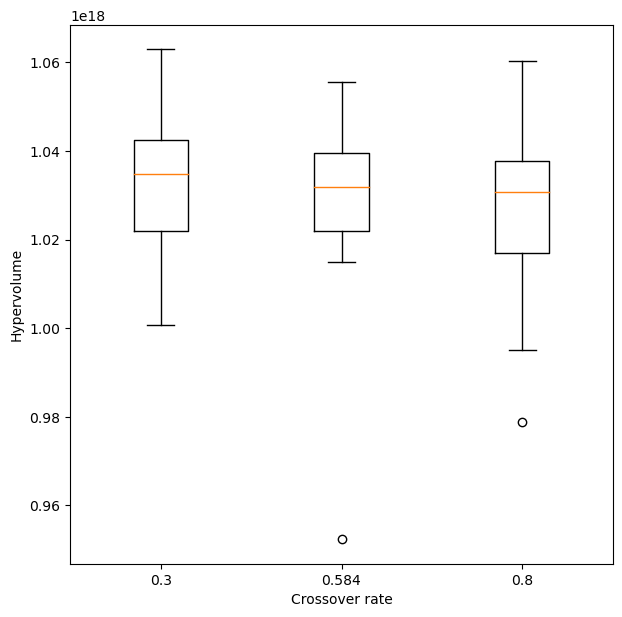

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot([hypervolumes[0], hypervolumes[1], hypervolumes[2]])
ax.set_xticklabels(["0.3", "0.584", "0.8"])
ax.set_xlabel('Crossover rate')
ax.set_ylabel('Hypervolume')
plt.savefig('moga_crossover.pdf')

In [96]:
hypervolumes[0].mean()
#np.median(hypervolumes[0])

1.0318840995634756e+18

In [97]:
hypervolumes[1].mean()
#np.median(hypervolumes[1])

1.0282438422302536e+18

In [98]:
hypervolumes[2].mean()
#np.median(hypervolumes[2])

1.0253360527758803e+18

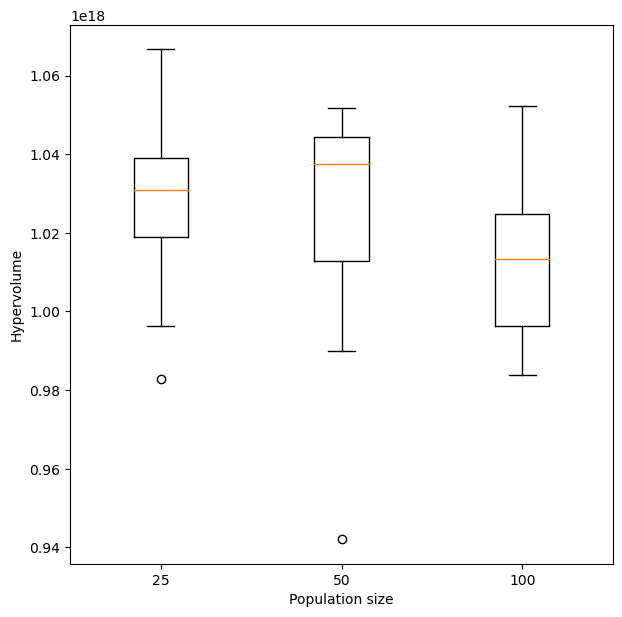

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot([hypervolumes[4],hypervolumes[5], hypervolumes[3]])
ax.set_xticklabels(["25", "50", "100"])
ax.set_xlabel('Population size')
ax.set_ylabel('Hypervolume')
plt.savefig("moga_population.pdf")

In [90]:
hypervolumes[3].mean() #100

1.0130549650345257e+18

In [91]:
hypervolumes[4].mean() #25
#np.median(hypervolumes[4])

1.0269185853866367e+18

In [92]:
hypervolumes[5].mean() #50

1.0249260328643775e+18

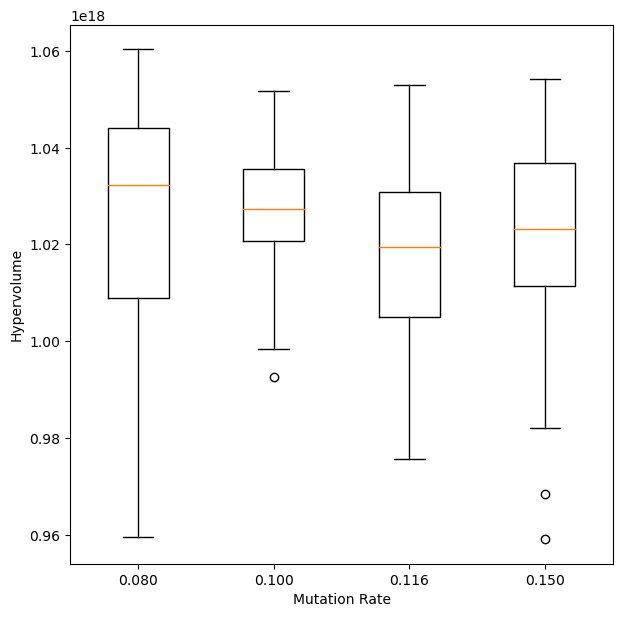

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot([hypervolumes[6], hypervolumes[7], hypervolumes[8], hypervolumes[9]])
ax.set_xticklabels(["0.080", "0.100", "0.116", "0.150"])
ax.set_xlabel('Mutation Rate')
ax.set_ylabel('Hypervolume')
plt.savefig("moga_mutation.pdf")

In [11]:
hypervolumes[6].mean()
#np.median(hypervolmes[6])

1.0248154248217203e+18

In [12]:
hypervolumes[7].mean()
#np.median(hypervolmes[7])

1.0247803120227505e+18

In [13]:
hypervolumes[8].mean()
#np.median(hypervolmes[8])

1.0169076269391377e+18

In [14]:
hypervolumes[9].mean()
#np.median(hypervolmes[9])

1.0186660191120036e+18